[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/BMED365-2026/blob/main/labs/Lab0-ML/notebooks/03-PyCaret.ipynb)


A.S. Lundervold, 02.01.2025

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](.) &nbsp; [![kaggle](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](.)

If you want to run this notebook on your own computer, install the Conda environment in the file `pycaret-environment.yml` as follows:

```bash
conda env create -f pycaret-environment.yml
```

Activate the environment:
```bash
conda activate pycaret
```

# A quick PyCaret tutorial

> PyCaret is an open-source, low-code machine learning library in Python designed to automate and streamline machine learning workflows. It serves as an end-to-end machine learning and model management solution, significantly enhancing productivity and reducing the time needed for experimentation in machine learning projects.

> This will be a concise tutorial on PyCaret. Consult the documentation at https://pycaret.gitbook.io/docs/ for more. 

# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [3]:
if (colab or kaggle):
    %pip install "pycaret[full]"

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

# Getting data

PyCaret comes with functionality for loading many standard benchmark datasets:

In [5]:
import pycaret

In [6]:
from pycaret.datasets import get_data

In [7]:
_ = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection               NaN               NaN   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit               NaN   
4       Classification (Binary)             Class               NaN   
5       Classification (Binary)             Class               NaN   
6       Classification (Binary)           default               NaN   
7       Classification (Binary)    Class variable               NaN   
8       Classification (Binary)             stabf               NaN   
9       Classification (Binary)              left               NaN   
10      Classification (Binary)             DEATH               NaN   
11      Classification (Binary)           Disease               NaN   
12      Classification (Bin

In [8]:
dataset = 'cancer'

In [9]:
data = get_data(dataset)

Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    5          1           1          1          2          1       3   
1      0    5          4           4          5          7         10       3   
2      0    3          1           1          1          2          2       3   
3      0    6          8           8          1          3          4       3   
4      0    4          1           1          3          2          1       3   

   breast-quad  irradiat  
0            1         1  
1            2         1  
2            1         1  
3            7         1  
4            1         1

In [10]:
target = 'Class'

> **Your turn!** Later, you should try out some of the other datasets listed above. You can also try to load your own data.

# Inspect the data

We'll use one of the smaller data sets to reduce computational time.  But, of course, you're welcome to try some of the other data sets listed above!

In [11]:
data[target].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [13]:
data.describe()

Class         age   menopause  tumor-size   inv-nodes   node-caps  \
count  683.000000  683.000000  683.000000  683.000000  683.000000  683.000000   
mean     0.349927    4.442167    3.150805    3.215227    2.830161    3.234261   
std      0.477296    2.820761    3.065145    2.988581    2.864562    2.223085   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    2.000000    1.000000    1.000000    1.000000    2.000000   
50%      0.000000    4.000000    1.000000    1.000000    1.000000    2.000000   
75%      1.000000    6.000000    5.000000    5.000000    4.000000    4.000000   
max      1.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

        deg-malig      breast  breast-quad    irradiat  
count  683.000000  683.000000   683.000000  683.000000  
mean     3.544656    3.445095     2.869693    1.603221  
std      3.643857    2.449697     3.052666    1.732674  
min      1.000000    1.000000     1.000000    1.000000  
25%      1.000000    2.000000     1.000000    1.000000  
50%      1.000000    3.000000     1.000000    1.000000  
75%      6.000000    5.000000     4.000000    1.000000  
max     10.000000   10.000000    10.000000   10.000000

# Explore the data

After downloading data and looking at its structure, one should start a more thorough exploration. We've seen how this can be done earlier in the course.

Here's a convenient package that can perform some of the common exploration steps automatically:

In [14]:
from ydata_profiling import ProfileReport

In [15]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Prepare the data and set up an experiment

In [16]:
from pycaret.classification import *

In [17]:
experiment = setup(data=data, target=target, normalize=True, 
                   normalize_method='robust', 
                   experiment_name='class_experiment', 
                   session_id=42)

> **Your turn!** Explore the various options PyCaret provides for setting up experiments using `setup`. 

# Train some baseline models

In [18]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [19]:
top_models = compare_models(n_select=5, sort='Accuracy', exclude=['ridge'])

# Hyperparameter tuning

We've found some candidate models: 

In [20]:
top_models

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=42, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=F

We'll want to tune their hyperparameters to try to improve their performance:

In [21]:
%%time
tuned_models = []
for m in top_models:
    print(f"Tuning model {str(m).split('(')[0]}...")
    tuned_m = tune_model(m, optimize='Accuracy', n_iter=600, fold=5, choose_better=True) 
    print(f"Model is tuned.")
    tuned_models.append(tuned_m)
    print("#"*100)
    print("#"*100)


Tuning model <catboost.core.CatBoostClassifier object at 0x000002416B5DFB90>...


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Model is tuned.
####################################################################################################
####################################################################################################
Tuning model GradientBoostingClassifier...


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Model is tuned.
####################################################################################################
####################################################################################################
Tuning model LogisticRegression...


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Model is tuned.
####################################################################################################
####################################################################################################
Tuning model SGDClassifier...


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Model is tuned.
####################################################################################################
####################################################################################################
Tuning model LGBMClassifier...


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Model is tuned.
####################################################################################################
####################################################################################################
CPU times: total: 1min 11s
Wall time: 2min 22s


**Note:** We've used the default parameter grids set by PyCaret. However, it's often a good idea to investigate more carefully what parameters to consider (as it depends not only on the model but also on the data). You can modify the grid using custom_grid. See the PyCaret source code for the default parameter grids. 

> These scores can be compared to those obtained when we used default parameters. Note that `tune_model` uses `RandomizedSearchCV` from scikit-learn as its default search strategy. It's, therefore, not guaranteed that you will find the best hyperparameter combination from the parameter grid during the search. You can, of course, change the search algorithm and also the search library (for example, you can use `scikit-optimize`).

# Ensembling

It's often possible to combine models in a way that outperforms each of the single models. Again, there are multiple ways of doing this. A simple way, as you know, is to use "voting ensembles." In PyCaret, we can use `blend_models` to construct voting ensembles. 

Let's try ensembling some of the best models found so far:

In [22]:
tuned_models

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.05, loss='log_loss', max_depth=7,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0001, min_samples_leaf=4,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=180, n_iter_no_change=None,
                            random_state=42, subsample=0.2, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=8.195, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0

In [23]:
n_models = 4
best_models = tuned_models[:n_models]

In [24]:
best_models

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.05, loss='log_loss', max_depth=7,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0001, min_samples_leaf=4,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=180, n_iter_no_change=None,
                            random_state=42, subsample=0.2, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=8.195, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0

In [25]:
voting_hard = blend_models(best_models, method='hard', optimize='Accuracy')

As we've seen earlier, one can also train a so-called "blender" on top of the predictions from a set of models and, in that way, make use of more complicated patterns than in a voting ensemble:

In [26]:
blender = stack_models(estimator_list=best_models, optimize='Accuracy')

# Evaluate the results

We'll pick the best model trained so far and evaluate it. 

In [27]:
best_model = automl(optimize = 'Accuracy')

In [28]:
best_model

## Confusion matrix

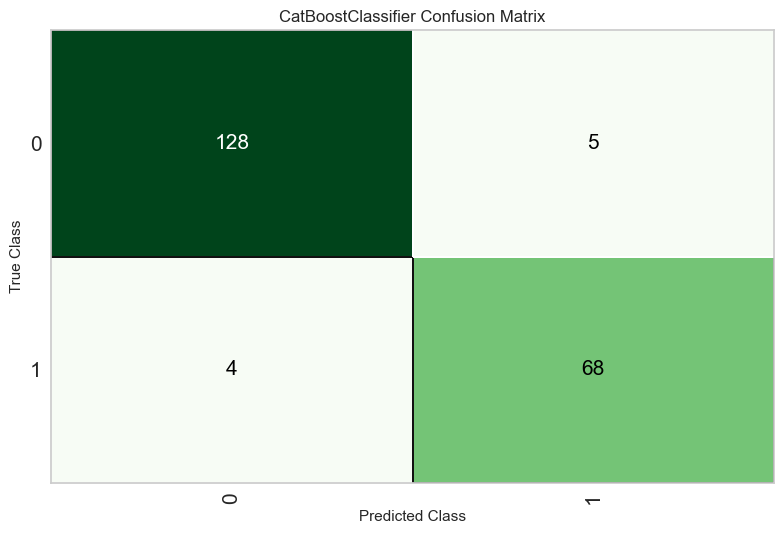

In [29]:
plot_model(best_model, 'confusion_matrix')

## Classification report

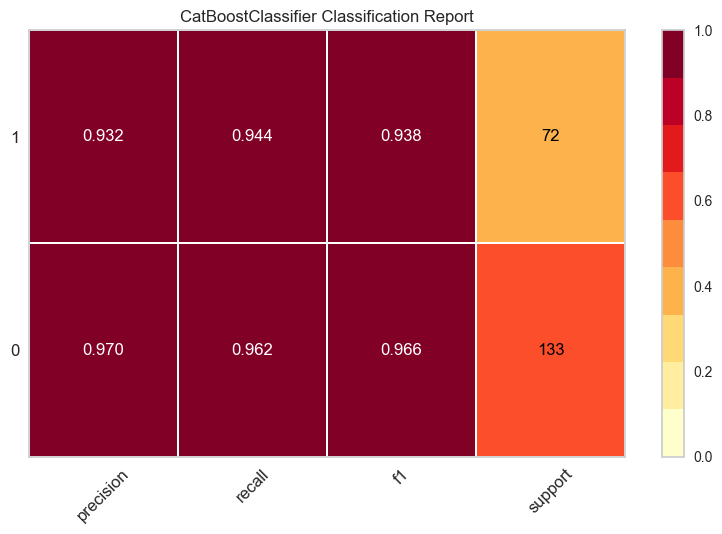

In [30]:
plot_model(best_model, 'class_report')

## Errors

Here's a plot of the errors made by the model:

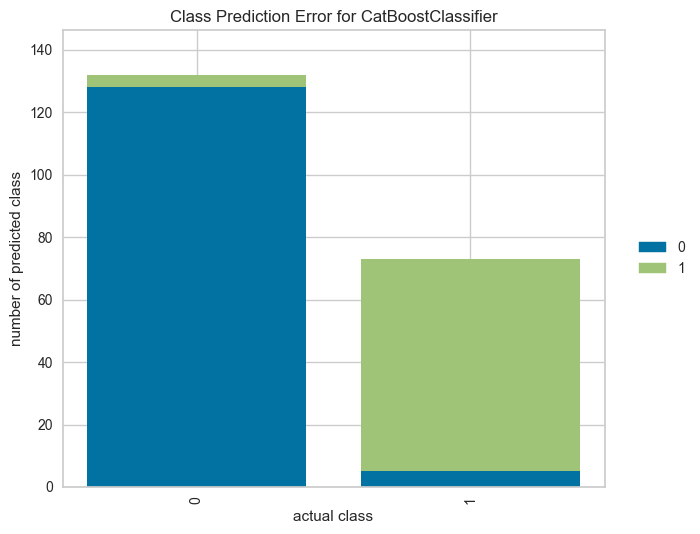

In [31]:
plot_model(best_model, 'error')

## Precision versus recall

We remember the so-called "bias-variance-tradeoff" and that there is typically a tradeoff between precision and recall. We can visualize where our models have set the thresholds:

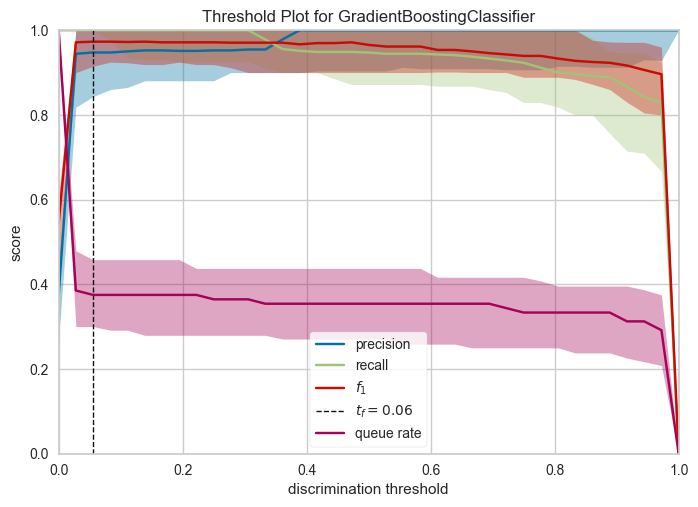

In [32]:
plot_model(best_models[1], 'threshold')

If you want to change this threshold (e.g., if false positives are worse than false negatives in your specific case), you can use the method `optimize_threshold`.

## Feature importance

Which features does the model lean on the most?

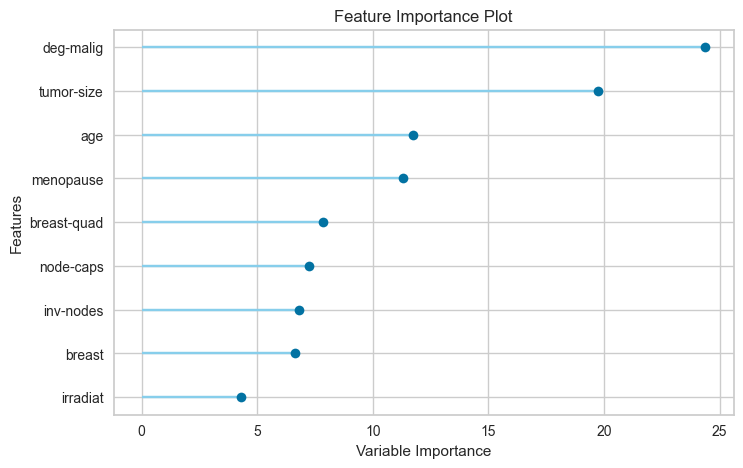

In [33]:
plot_model(best_models[0], 'feature')

Note that this can vary between different models.

In [34]:
print(best_models[1])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0001, min_samples_leaf=4,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=180, n_iter_no_change=None,
                           random_state=42, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


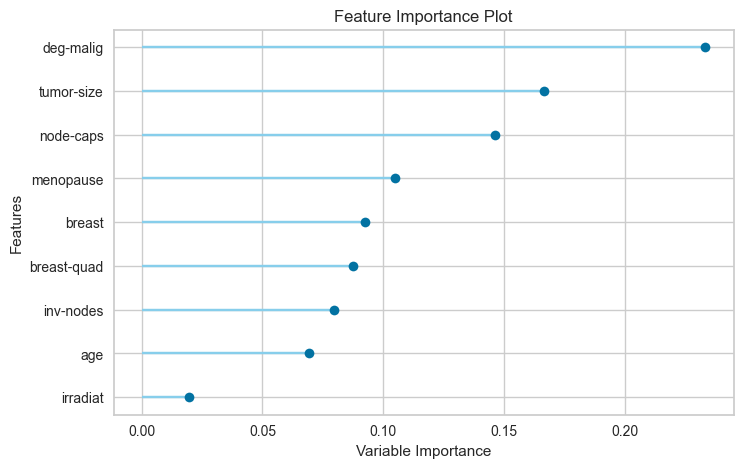

In [35]:
plot_model(best_models[1], 'feature')

## ExplainerDashboard

In [ ]:
dashboard(best_models[0])

# Use the model on new data

In [42]:
#??predict_model

In [38]:
# Predict on the test data we put aside earlier
y_pred = predict_model(best_model)

In [39]:
y_pred.head()

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
64     4          1           1          1          2          1       3   
676    3          1           1          1          2          1       1   
447    6          1           1          3          2          1       1   
460    3          1           1          1          2          1       1   
1      5          4           4          5          7         10       3   

     breast-quad  irradiat  Class  prediction_label  prediction_score  
64             1         1      0                 0            0.9998  
676            1         1      0                 0            0.9998  
447            1         1      0                 0            0.9985  
460            1         1      0                 0            0.9998  
1              2         1      0                 1            0.9827

# Export the pipeline

When you are done constructing, training, evaluating, and interpreting the models, it's time to deploy them. First, you'll want to export the model together with the entire pipeline for pre-processing to, for example, the hard drive, to memory, or to or cloud provider.

When you start making predictions on entirely new data (in other words, after you've completed the first stage of the model building), then you can use `predict_model` on this data. The data will then be preprocessed according to the pipeline and passed through the model.

Remark: until now, we've put aside some data for testing. If you're done constructing the model, there's no point in not using this (often valuable) labeled data for training. One would like to train the model on _all_ the available labeled data. 

This can be achieved by using `finalize_model`:

In [40]:
final_model = finalize_model(best_model)

Then we can save the model:

In [41]:
save_model(final_model,'saved_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                                     transformer=Robust